# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
  
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (12,5) 

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь*** $$ w_{new} = w_{old} - \alpha \nabla_{w}L(w)$$
$$w_{new} = w_{old} - 2 \alpha ( \frac{1}{n} \sum_{i = 1}^{n} ( \langle x_{i}, w_{old} \rangle - y_{i})x_{i} + \frac{w_{old}}{C})$$ $\alpha$ - неотрицательная величина, длина шага оптимизации, может быть задана как невозрастающая $f(k)$, где $k$ - номер шага оптимизации

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь*** $$ w_{new} = w_{old} - \alpha \nabla_{w}L(w)$$
$$ w_{new} = w_{old} - \alpha (\frac{1}{nln2} \sum_{i = 1}^{n} \frac{((1 - y_{i})e^{\langle x_{i}, w_{old} \rangle} - y_{i})x_{i}}{e^{\langle x_{i}, w_{old} \rangle} + 1} + \frac{2 w_{old}}{C})$$
Не похоже на формулу для LinReg, однако:
$$ w_{new} = w_{old} - \alpha (\frac{1}{nln2} \sum_{i = 1}^{n} \frac{((1 - y_{i}) - y_{i}e^{- \langle x_{i}, w_{old} \rangle})x_{i}}{1 + e^{- \langle x_{i}, w_{old} \rangle}} + \frac{2 w_{old}}{C})$$
$$ w_{new} = w_{old} - \alpha (\frac{1}{nln2} \sum_{i = 1}^{n} (\frac{1}{1 + e^{- \langle x_{i}, w_{old} \rangle}} - y_{i})x_{i} + \frac{2 w_{old}}{C})$$
Итого, общая формула для двух алгоритмов имеет вид:
$$ w_{new} = w_{old} - \alpha (\frac{1}{n} \sum_{i = 1}^{n} (a(x_{i}) - y_{i})x_{i} + \frac{w_{old}}{C})$$
(все константы убраны так как не влияют на сходимость)

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Гессиан выглядит так.
$$ H(f(w)) =
 \begin{pmatrix}
  \frac{\partial^{2} f}{\partial w_{0}^{2}} & \frac{\partial^{2} f}{\partial w_{0} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{0} \partial w_{D}} \\
  \frac{\partial^{2} f}{\partial w_{1} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{0}^{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{1} \partial w_{D}} \\
  \vdots  & \vdots  &  \frac{\partial^{2} f}{\partial w_{i} \partial w_{j}} & \vdots  \\
  \frac{\partial^{2} f}{\partial w_{D} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{D} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{D}^{2}} 
 \end{pmatrix}$$
 В нашем случае $f(w) = \frac{1}{n}(w^{T} X^{T} X w - w^{T} X^{T}y - y^{T}Xw + y^{T}y)$
 
 Далее деление на $n$ можно опустить, так как мы ищем минимум функции, а умножение на константу на это не влияет
 
 Тогда:
 $$ H(f(w)) = 2
 \begin{pmatrix}
  x_{0}^{T}x_{0} & x_{0}^{T}x_{1} & \cdots & x_{0}^{T}x_{D} \\
  x_{1}^{T}x_{0} & x_{1}^{T}x_{1} & \cdots & x_{1}^{T}x_{D} \\
  \vdots  & \vdots  & x_{i}^{T}x_{j} & \vdots  \\
  x_{D}^{T}x_{0} & x_{D}^{T}x_{1} & \cdots & x_{D}^{T}x_{D}
 \end{pmatrix}$$
 
 Получается, что $ H(f(w)) = 2 X^{T}X \implies \exists B = \sqrt{2} X: B^{T}B = H(f(w))$, при этом X невырождена, так как имеет строк не меньше, чем столбцов и полный ранг $\implies H(f(w))$ положительно определена. 
 
Для L2 регуляризации: 
$$f(w) = \frac{1}{n}(w^{T} X^{T} X w - w^{T} X^{T}y - y^{T}Xw + y^{T}y) + \frac{1}{C}w^{T}w$$
$$ \nabla_{w}f(w) = 2X^{T}Xw - 2X^{T}y + \frac{2}{C}Iw $$
$$ \nabla_{w} f(w) = 0 \iff w = (X^{T}X + \frac{I}{C})^{-1} X^{T}y $$

Нашли решение для линейной регрессии с L2 регуляризацией
L2 помогает, тк делает матрицу невырожденной.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$\frac{dE(L|x_i)}{da(x_i)} = \frac{1}{\ln2}(\frac{-p(y_i = 1 |x_i)}{a(x_i)} + \frac{p(y_i = 0 | x_i)}{1 - a(x_i)
})$$

$$\frac{dE(L|x_i)}{da(x_i)} = \frac{-p(y_i = 1 |x_i) + a(x_i)p(y_i = 1 |x_i) + a(x_i)p(y_i = 0 | x_i)}{\ln 2 \cdot a(x_i)(1 - a(x_i))}$$ 

Воспользуемся тем, что $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac{dE(L|x_i)}{da(x_i)} = \frac{a(x_i) - p(y_i = 1 |x_i)}{\ln 2 \cdot a(x_i)(1 - a(x_i))}$$

$$ \frac{dE(L|x_i)}{da(x_i)} = 0 \iff \begin{cases} a(x_i) \neq 0\\ a(x_i) \neq 1\\ a(x_i) = p(y_i = 1 |x_i) \end{cases} $$

Очевидно, $a(x_i) = p(y_i = 1 |x_i)$ - точка минимума мат. ожидания.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Мы вводим $w_{0}$ чтобы задать значение предсказания в случае, когда все признаки равны нулю или близки к нулю. Такой объект не обязательно имеет целевую переменную 0 (LinReg) или имеет равную вероятность принадлежности обоим классам (LogReg). Но также $w_0$ отвечает за удаление прямой(гиперплоскости) от начала координат и если не регуляризовывать его при условии регуляризации всех остальных, то он получится в разы больше остальных и, скорее всего, разделяющая прямая (гиперплоскость) будет неадекватной. Да, нужно.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [4]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [6]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X = np.array(X)
    y = np.array(y)
    if not shuffle:
        begin = 0
        end = batch_size
        while end < y.size:
            yield (X[begin:end], y[begin:end])
            begin += batch_size
            end += batch_size
        yield (X[begin::], y[begin::])
    else:
        ind = np.array(range(y.size))
        while ind.size > batch_size:
            batch_ind = np.random.choice(np.arange(ind.size),
                                         size=batch_size,
                                         replace=False)
            batch = ind[batch_ind]
            ind = np.delete(ind, batch_ind)
            yield(X[batch], y[batch])
        yield(X[ind], y[ind])

In [8]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin
from math import exp, log2, log


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    try:
        sigm_value_x = 1/(1 + exp(-x))
        return sigm_value_x
    except OverflowError:
        return 0


def mylog2(x):
    if x == 0.0:
        return -1.3131231e+70
    return log2(x)


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator,
                 C=1, alpha=0.01, max_epoch=10, model_type='lin_reg',
                 batch_size=1, border=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.border = border
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        X = np.array(X_batch)
        add = np.array([1] * (X.shape[0]))
        add = add.reshape(-1, 1)
        X = np.hstack((add, X))
        y = np.array(y_batch)
        w = np.array(self.weights)
        loss = X * w
        loss = loss.sum(axis=1)
        loss = loss.reshape(1, -1)
        loss = loss.ravel()
        if self.model_type == 'lin_reg':
            loss = loss - y
            loss = loss ** 2
            loss = loss.sum()
        elif self.model_type == 'log_reg':
            loss = np.array(list(map(sigmoid, loss)))
            one_loss = loss[np.where(y == 1)]
            one_loss = np.array(list(map(mylog2, one_loss)))
            one_loss_sum = np.sum(one_loss)
            zero_loss = loss[np.where(y == 0)]
            zero_loss = -zero_loss
            zero_loss = zero_loss + 1
            zero_loss = np.array(list(map(mylog2, zero_loss)))
            zero_loss_sum = zero_loss.sum()
            loss = zero_loss_sum + one_loss_sum
            loss = -loss
        loss /= y.size
        reg = w ** 2
        reg = reg.sum()
        reg /= self.C
        loss += reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        X = np.array(X_batch)
        add = np.array([1] * (X.shape[0]))
        add = add.reshape(-1, 1)
        X = np.hstack((add, X))
        y = np.array(y_batch).reshape(1, -1)
        w = np.array(self.weights).reshape(1, -1)
        a = X * w
        a = a.sum(axis=1)
        a = a.ravel()
        if self.model_type == 'log_reg':
            a = np.array(list(map(sigmoid, a))) 
        a = a - y
        a = a.reshape(-1, 1)
        loss_grad = X * a
        loss_grad = loss_grad.mean(axis=0)
        reg = w / self.C
        if self.model_type == 'log_reg':
            loss_grad = loss_grad / log(2)
            reg = reg * 2
        loss_grad = loss_grad + reg
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - (new_grad * self.alpha)
        
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        X = np.array(X)
        y = np.array(y)
        np.random.seed(0)
        self.weights = np.random.randint(1, 100, size=(X.shape[1] + 1))
        self.weights = self.weights.astype(float)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size = self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        batch_loss = self.calc_loss(X, y)
        self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X1 = np.array(X)
        add = np.array([1] * (X1.shape[0]))
        add = add.reshape(-1, 1)
        X1 = np.hstack((add, X1))
        w = np.array(self.weights)
        y_hat = X1 * w
        y_hat = y_hat.sum(axis=1)
        y_hat = y_hat.ravel()
        if self.model_type == 'log_reg':
            y_hat = np.array(list(map(sigmoid, y_hat)))
            y_hat = (y_hat >= self.border).astype(int) 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    x = np.linspace(-50, 50)
    y = ((clf.weights[0][1]) * x + clf.weights[0][0])/(-clf.weights[0][2])
    line1, = plt.plot(x, y, '-g', label='mySGD')
    return line1

[[-0.08130203  0.23897376 -0.13565709]]


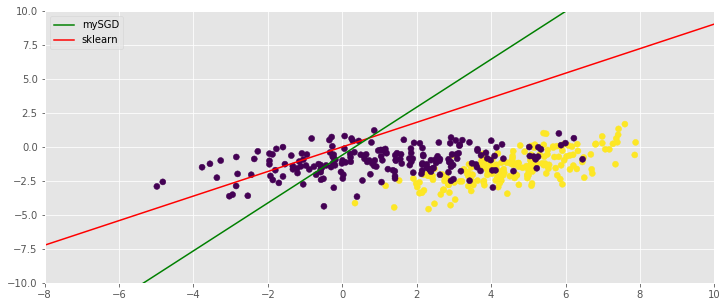

In [10]:
from sklearn.linear_model import SGDClassifier

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.05)
my_clf.fit(X, y)

clf = SGDClassifier(loss='log').fit(X, y)
x = np.linspace(-50, 50)
k = ((clf.coef_[0][0]) * x)/(-clf.coef_[0][1])
line2, = plt.plot(x, k, '-r', label='sklearn')

line1 = plot_decision_boundary(my_clf)
print(my_clf.weights)

plt.legend(handles=[line1, line2])
plt.ylim(-10, 10)
plt.xlim(-8, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

[ 0.14354486 -0.17043888]
[[ 0.01608667  0.12142962 -0.1326801 ]]


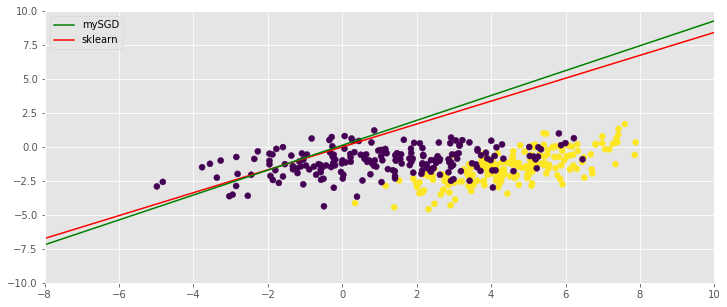

In [11]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='lin_reg')
my_clf.fit(X, y)

clf = LinearRegression().fit(X, y)

print(clf.coef_)
x = np.linspace(-50, 50)
k = ((clf.coef_[0]) * x)/(-clf.coef_[1])
line2, = plt.plot(x, k, '-r', label='sklearn')

line1 = plot_decision_boundary(my_clf)
print(my_clf.weights)

plt.legend(handles=[line1, line2])
plt.ylim(-10, 10)
plt.xlim(-8, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,   
                           n_clusters_per_class=1)   

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

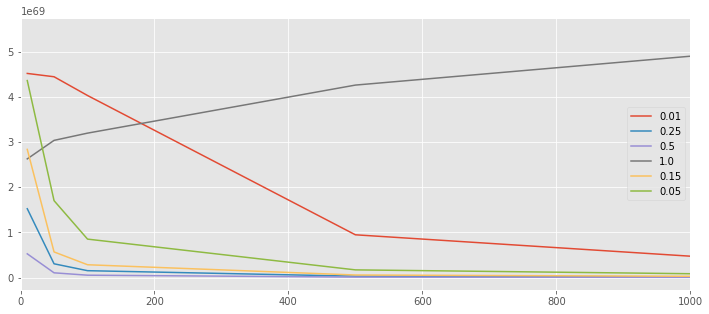

In [14]:
clf = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line1, = plt.plot(N_mas, mas, label='0.01')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.25, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line2, = plt.plot(N_mas, mas, label='0.25')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.5, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line3, = plt.plot(N_mas, mas, label='0.5')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=1.0, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line4, = plt.plot(N_mas, mas, label='1.0')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.15, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line5, = plt.plot(N_mas, mas, label='0.15')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.05, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line6, = plt.plot(N_mas, mas, label='0.05')

plt.xlim(0, 1000)

plt.legend(handles=[line1, line2, line3, line4, line5, line6])  
plt.show()

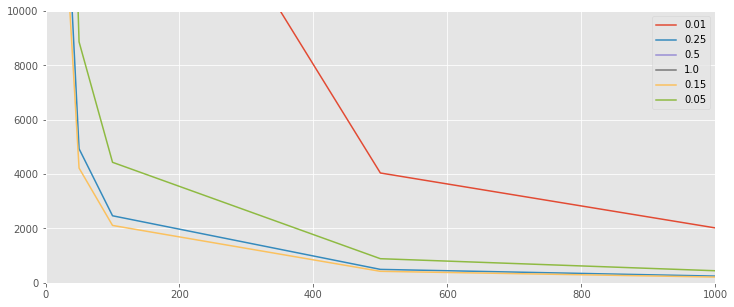

In [15]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
clf = MySGDClassifier(batch_generator, model_type='lin_reg', batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line1, = plt.plot(N_mas, mas, label='0.01')
clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.25, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line2, = plt.plot(N_mas, mas, label='0.25') 

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.5, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000]  
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line3, = plt.plot(N_mas, mas, label='0.5')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=1.0, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line4, = plt.plot(N_mas, mas, label='1.0')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.15, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line5, = plt.plot(N_mas, mas, label='0.15')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.05, batch_size=50)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line6, = plt.plot(N_mas, mas, label='0.05')

plt.xlim(0, 1000)
plt.ylim(0, 10000)

plt.legend(handles=[line1, line2, line3, line4, line5, line6]) 
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?
Нужно смотреть и выбирать. Вообще можно проследить зависимость, что чем больше шагов мы можем себе позволить, тем меньше мы можем поставить `alpha`. Так же можно `alpha` каждые n шагов.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

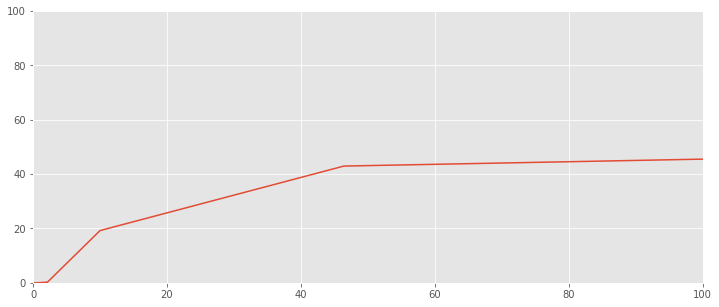

In [16]:
x = np.logspace(3, -3, 10)
p = []
for i in x:
    p.append(np.mean(MySGDClassifier(batch_generator,
                                     model_type='log_reg',
                                     C=i, batch_size=200).fit(X, y).weights))
plt.plot(x, p)
plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.show()

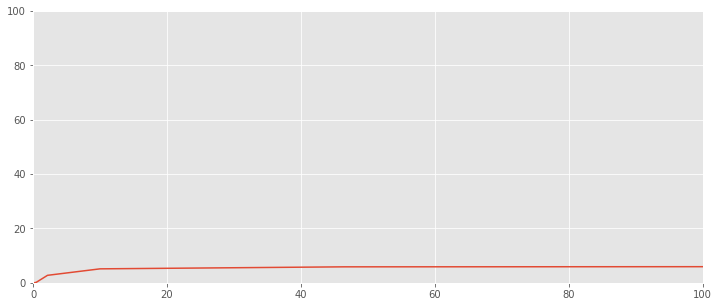

In [17]:
x = np.logspace(3, -3, 10)
p = []
for i in x:
    p.append(np.mean(MySGDClassifier(batch_generator,
                                     model_type='lin_reg',
                                     C=i, batch_size=600).fit(X, y).weights))
plt.plot(x, p)
plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [18]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [19]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [20]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [22]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
st = StandardScaler()
X = st.fit_transform(X_train, y_train)
print(X.shape)

(11690, 15)


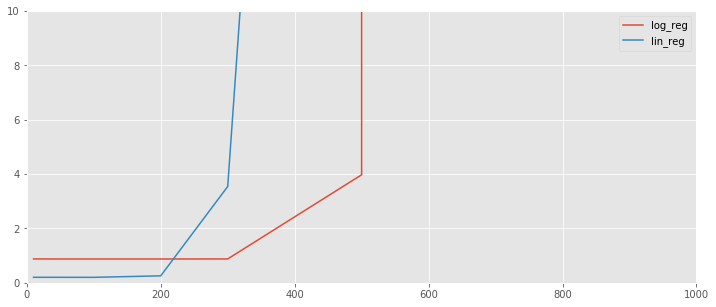

In [25]:
mas = [10, 50, 100, 200, 300, 500, 800, 1000]
mas1 = []
mas2 = []
for i in mas:
    my_clf = MySGDClassifier(batch_generator,
                             model_type='log_reg',
                             batch_size=i).fit(X, y_train)
    mas1.append(my_clf.errors_log['loss'][-1])
    my_clf = MySGDClassifier(batch_generator,
                             model_type='lin_reg',
                             batch_size=i).fit(X, y_train)
    mas2.append(my_clf.errors_log['loss'][-1])
l1, = plt.plot(mas, mas1, label='log_reg')
l2, = plt.plot(mas, mas2, label='lin_reg')
plt.legend(handles=[l1, l2])
plt.xlim(0, 1000)
plt.ylim(0, 10)
plt.show()

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [ ]:
from sklearn.model_selection import KFold,TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from hyperopt import hp
from sklearn.model_selection import StratifiedKFold
import catboost
import gc

import time
def objective(space, sid):
    time1 = time.time()

    params = dict()
    params['n_estimators'] = space['n_estimators']
    params['learning_rate'] = space['learning_rate']
    params['depth'] = int(space['depth'])
    params['l2_leaf_reg'] = space['l2_leaf_reg']
    params['border_count'] = int(space['border_count'])
    #params['max_leaves'] = int(space['max_leaves'])
    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 5
    count=1
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=sid)

    score_mean = 0
    for tr_idx, val_idx in skf.split(X_train, y_train):
        clf = catboost.CatBoostClassifier(
            verbose=700,
            random_seed=4,
            loss_function='MultiClass',
            auto_class_weights = 'Balanced',
            **params
        )

        X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        print(X_tr.shape)
        clf.fit(X_tr, y_tr, cat_features = X_train.select_dtypes(include='category').columns)
        #y_pred_train = clf.predict_proba(X_vl)[:,1]
        y_preds = clf.predict(X_vl)
        #print(y_pred_train)
        score = f1_score(y_vl, y_preds, average='macro')
        # plt.show()
        score_mean += score
        print(f'{count} CV - score: {round(score, 4)}')
        count += 1
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    gc.collect()
    print(f'Mean macro f1: {score_mean / FOLDS}')
    del X_tr, X_vl, y_tr, y_vl, clf, score
    return -(score_mean / FOLDS)


space = {
        'n_estimators': hp.choice('n_estimators', [800, 1100, 1400, 1600, 950, 1250,]),
        'depth': hp.quniform("depth", 4, 12, 1),
        'border_count': hp.uniform ('border_count', 32, 255),
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.2),
        'l2_leaf_reg': hp.uniform('l2_leaf_reg', 3, 8)
}



In [63]:
import time
from sklearn.model_selection import KFold,TimeSeriesSplit
from sklearn.metrics import f1_score
from hyperopt import hp
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True)
def objective(space):
    time1 = time.time()

    params = dict()
    params['C'] = space['C']
    params['alpha'] = space['alpha']
    params['max_epoch'] = int(space['epochs'])
    params['model_type'] = space['model_type']
    params['border'] = space['border']
    params['batch_size'] = space['batch_size']
    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 4
    count=1

    score_mean = 0
    clf = MySGDClassifier(batch_generator,
                          **params)
    sp = kf.split(X)
    scores = []
    for train_ind, test_ind in sp:
        clf.fit(X[train_ind], y_train[train_ind])
        scores.append(f1_score(y_train[test_ind],
                               clf.predict(X[test_ind]) if clf.model_type=='log_reg' else (clf.predict(X[test_ind]) >= 0.5)
                                       .astype(int)))
    score = np.mean(np.array(scores))
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    #gc.collect()
    print(f'Mean macro f1: {score}')
    return -score

space = {
        'C': hp.uniform("C", 0.01, 5),
        'alpha': hp.uniform("alpha", 0.03, 0.11),
        'epochs': hp.choice('epochs', [6, 10, 20, 30, 40, 80,]),
        'model_type': hp.choice('model_type', ['log_reg']),
        'border': hp.uniform("border",0.4, 0.6),
        'batch_size': hp.choice("batch_size", [60, 70, 80, 90, 100])
}


In [64]:
from hyperopt import fmin, tpe, Trials, space_eval
import lightgbm as lgb
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

# Print best parameters
best_params = space_eval(space, best)

                                                       
############## New Run ################
params = {'C': 1.5237936997634385, 'alpha': 0.06793258328915293, 'max_epoch': 40, 'model_type': 'log_reg', 'border': 0.5421843441731071, 'batch_size': 80}
Total Time Run: 0.11                                   
Mean macro f1: 0.5878067786004241                      
                                                                                  
############## New Run ################
params = {'C': 1.7587070497281498, 'alpha': 0.034808159975115285, 'max_epoch': 80, 'model_type': 'log_reg', 'border': 0.4062528879281063, 'batch_size': 70}
Total Time Run: 0.25                                                              
Mean macro f1: 0.6054998319799235                                                 
                                                                                  
############## New Run ################
params = {'C': 2.6584024877878782, 'alpha': 0.03290527532611349, 'max

Total Time Run: 0.28                                                               
Mean macro f1: 0.6152245504785687                                                  
                                                                                   
############## New Run ################
params = {'C': 2.6424438086131286, 'alpha': 0.06308804442860277, 'max_epoch': 80, 'model_type': 'log_reg', 'border': 0.49687075723063995, 'batch_size': 100}
Total Time Run: 0.2                                                                
Mean macro f1: 0.6065518700786017                                                  
                                                                                   
############## New Run ################
params = {'C': 3.792806018297542, 'alpha': 0.0825086943852379, 'max_epoch': 30, 'model_type': 'log_reg', 'border': 0.44668395995170396, 'batch_size': 90}
Total Time Run: 0.08                                                               
Mean macro f1: 0.6169

Mean macro f1: 0.6169208433559095                                                  
                                                                                   
############## New Run ################
params = {'C': 2.914549698100633, 'alpha': 0.10833852797971914, 'max_epoch': 20, 'model_type': 'log_reg', 'border': 0.5162500866460746, 'batch_size': 70}
Total Time Run: 0.06                                                               
Mean macro f1: 0.5867829447424787                                                  
                                                                                   
############## New Run ################
params = {'C': 2.4015076853822737, 'alpha': 0.05552251921312126, 'max_epoch': 10, 'model_type': 'log_reg', 'border': 0.4569610801592169, 'batch_size': 90}
Total Time Run: 0.03                                                               
Mean macro f1: 0.6177026542440451                                                  
                       

                                                                                   
############## New Run ################
params = {'C': 2.1840541387813857, 'alpha': 0.06943521679227174, 'max_epoch': 20, 'model_type': 'log_reg', 'border': 0.4493958868728932, 'batch_size': 90}
Total Time Run: 0.05                                                               
Mean macro f1: 0.6179121897929372                                                  
                                                                                   
############## New Run ################
params = {'C': 2.544905588014789, 'alpha': 0.03432314189613602, 'max_epoch': 80, 'model_type': 'log_reg', 'border': 0.46082072495379933, 'batch_size': 100}
Total Time Run: 0.21                                                               
Mean macro f1: 0.6183102503121243                                                  
                                                                                   
############## New Ru

params = {'C': 2.8160751192833193, 'alpha': 0.0932112834942277, 'max_epoch': 30, 'model_type': 'log_reg', 'border': 0.4006240235424842, 'batch_size': 60}
Total Time Run: 0.1                                                                
Mean macro f1: 0.6077846500929205                                                  
                                                                                   
############## New Run ################
params = {'C': 2.069575179563663, 'alpha': 0.06882601376973034, 'max_epoch': 10, 'model_type': 'log_reg', 'border': 0.46468554509690624, 'batch_size': 80}
Total Time Run: 0.03                                                               
Mean macro f1: 0.6172117452787591                                                  
                                                                                   
############## New Run ################
params = {'C': 3.178975189729301, 'alpha': 0.04726390880424415, 'max_epoch': 80, 'model_type': 'log_reg', '

Total Time Run: 0.12                                                               
Mean macro f1: 0.6024834146963334                                                  
                                                                                   
############## New Run ################
params = {'C': 2.4450439949841343, 'alpha': 0.09841426446267988, 'max_epoch': 30, 'model_type': 'log_reg', 'border': 0.48751981451917853, 'batch_size': 100}
Total Time Run: 0.09                                                               
Mean macro f1: 0.6144583667509731                                                  
                                                                                   
############## New Run ################
params = {'C': 4.1749191823696155, 'alpha': 0.055876351558111825, 'max_epoch': 20, 'model_type': 'log_reg', 'border': 0.40369943657346663, 'batch_size': 80}
Total Time Run: 0.07                                                               
Mean macro f1: 0.6

In [45]:
print(best_params)  ## first best_params

{'C': 0.3128487463553368, 'alpha': 0.08342906743626789, 'epochs': 8, 'model_type': 'log_reg'}


In [49]:
print(best_params)  ## second best_params - loss -0.6183992753228102

{'C': 0.2319046572611057, 'alpha': 0.08974537610057035, 'epochs': 5, 'model_type': 'log_reg'}


In [53]:
print(best_params)  ## 3 best_params - loss -0.61861

{'C': 0.4075023685769006, 'alpha': 0.08829743933525243, 'border': 0.49605845436989066, 'epochs': 6, 'model_type': 'log_reg'}


In [56]:
print(best_params)  ## 4 best_params - loss -0.6191

{'C': 0.5337447918136524, 'alpha': 0.08808262862193669, 'batch_size': 80, 'border': 0.4939821728809876, 'epochs': 3, 'model_type': 'log_reg'}


In [65]:
print(best_params)  ## 5 best_params - loss -0.6195

{'C': 2.858440613452057, 'alpha': 0.07208684411098008, 'batch_size': 70, 'border': 0.4416926504452512, 'epochs': 80, 'model_type': 'log_reg'}


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [58]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [59]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)
print(groups_test)

(16627, 15) (16627,)
[130 130 130 ... 309 309 309]


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [66]:
best_params = {'C': 2.858440613452057, 'alpha': 0.07208684411098008, 'batch_size': 70, 'border': 0.4416926504452512, \
               'max_epoch': 80, 'model_type': 'log_reg'}
clf = MySGDClassifier(batch_generator, **best_params)
clf.fit(X, y_train)

st = StandardScaler()
X_test = st.fit_transform(X_test)
print(X_test.shape)

y = clf.predict(X_test)
u, counts = np.unique(y, return_counts=True)
print(counts)
r = range(11691, 28318)
print(len(r))

(16627, 15)
[10644  5983]
16627


In [68]:

data = {'pair_id' : range(11691, 28318), 'target': y}
res = pd.DataFrame(data)
res.to_csv('preds2.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***